In [3]:
#dependancies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
from flask import jsonify

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflecting existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
conn=engine.connect()

In [9]:
# classes through automap
Base.classes.keys()

['measurement', 'station']

In [10]:
# Saved references from each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
session=Session(engine)

# Exploratory Climate Analysis

In [13]:
# Designed a query to retrieve the last 12 months of precipitation data and ploted the results

#last date(point) on database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# calculating date one year before last date(12 months)
one_year_ago= dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [14]:
# Performed a query to retrieve the data and precipitation scores
# Saved the query results as a Pandas DataFrame and set the index to the date column
# Sorted the dataframe by date

#query to dataframe
data=pd.read_sql('select date,prcp from Measurement ',conn)

#date set to index, and filtered to last 12 months
date=data.sort_values('date')
date=date.set_index('date').dropna()
date=date.loc['2016-08-23':'2017-08-23']
date.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.70
2016-08-23,1.79
2016-08-23,0.02
2016-08-23,0.15


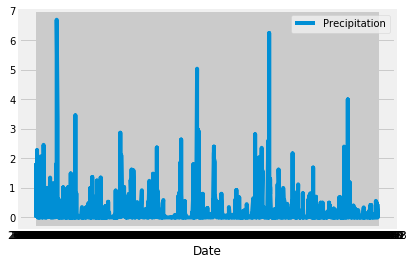

In [15]:
# Used Pandas and Matplotlib to plot the data
prcp=date['prcp']
plt.plot(prcp,label='Precipitation')
plt.xlabel('Date')
plt.legend(loc=1)
plt.show()

In [16]:
# Used Pandas to calcualte the summary statistics for the precipitation data

##statistical analysis
stats=prcp.describe()
stats=pd.DataFrame(stats)
stats

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Designed a query to show how many stations are available in this dataset?

stations_data=session.query(Station.station).count()
stations_data

9

In [236]:
# We can see which stations are the most active

data_station=pd.read_sql('select * from measurement',conn)
data_station=data_station['station'].value_counts()
data_station=pd.DataFrame(data_station)
data_station.sort_values('station')

,station
USC00518838,511
USC00517948,1372
USC00511918,1979
USC00514830,2202
USC00516128,2612
USC00519523,2669
USC00513117,2709
USC00519397,2724
USC00519281,2772


In [26]:
# Used the station id from the previous query to calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
station_temp=pd.read_sql('select * from measurement',conn)
busy_station=station_temp['station']=='USC00519281'
station_temp=station_temp[busy_station]
max_temp=station_temp['tobs'].max()
min_temp=station_temp['tobs'].min()
avg_temp=station_temp['tobs'].mean()
print(f'The maximum temperature was {max_temp}')
print(f'The lowest temperature was {min_temp}')
print(f'The average temperatue was {round(avg_temp,2)}')

The maximum temperature was 85.0
The lowest temperature was 54.0
The average temperatue was 71.66


In [27]:
#created DataFrame to visualize data
temp=pd.read_sql('select * from measurement',conn)
temp.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [28]:
#looking for the station with the highest number of temperature observations

highest_obs=temp.groupby('station')['tobs'].sum()
highest_obs=pd.DataFrame(highest_obs)
highest_obs=highest_obs.sort_values('tobs')
highest_obs

,tobs
station,
USC00518838,37162.0
USC00517948,102467.0
USC00511918,141728.0
USC00514830,164871.0
USC00516128,185230.0
USC00513117,196915.0
USC00519281,198652.0
USC00519523,198957.0
USC00519397,203083.0


In [29]:
temp.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


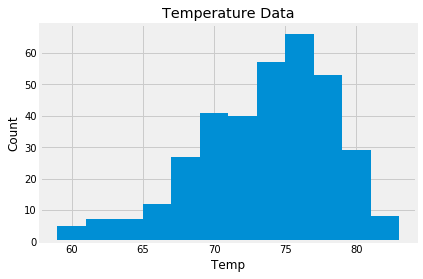

In [239]:

# Queried the last 12 months of temperature observation data for this station and ploted the results as a histogram
temp=pd.read_sql('select station,date,tobs from measurement ',conn)

highest_station=temp['station']=='USC00519281'
temp=temp[highest_station]
temp=temp.set_index('date')

temp=temp.loc['2016-08-23':'2017-08-23']
temp
temperatures=temp['tobs']

plt.title('Temperature Data')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.hist(temperatures, 12)
plt.show()


In [ ]:
#function for max,min,and average temp for all dates greater than start date
def dates(date):
    session=Session(engine)
    
    list_dates=[]
    list_tobs=[]
    for i,t in session.query(Measurement,Measurement):
        list_dates.append(i.date)
        list_tobs.append(i.tobs)
    dictionary=dict(zip(list_dates,list_tobs))
    
    temp_dict={}
    final_list=[]
    for i in dictionary.keys():
        
        if i>=str(date):
            final_list.append(dictionary[str(i)])
            temp_dict['Max Temperature']=max(final_list)
            temp_dict['Min Temperature']=min(final_list)
            temp_dict['Avg Temperatre']=round(sum(final_list)/len(final_list),2)
    return (temp_dict)

In [234]:
dates('2010-01-02')

{'Max Temperature': 86.0, 'Min Temperature': 57.0, 'Avg Temperatre': 70.99}

In [228]:
# This function called `calc_temps` will accept start date and end date
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
     
    list_dates=[]
    list_tobs=[]
    for i,t in session.query(Measurement,Measurement):
        list_dates.append(i.date)
        list_tobs.append(i.tobs)
    dictionary=dict(zip(list_dates,list_tobs))
    
    temp_dict={}
    final_list_full=[]
    for i in dictionary.keys():
        if i >=str(start_date) and i<=str(end_date):
            final_list_full.append(dictionary[str(i)])
            temp_dict['Max Temperature']=max(final_list_full)
            temp_dict['Min Temperature']=min(final_list_full)
            temp_dict['Avg Temperature']=round(sum(final_list_full)/len(final_list_full),2)
            
    return(temp_dict)
    

   

In [229]:
 calc_temps('2012-02-28', '2012-03-05')

{'Max Temperature': 69.0, 'Min Temperature': 64.0, 'Avg Temperature': 66.86}

In [230]:
#function example
calc_temps('2013-01-01','2014-01-01')

{'Max Temperature': 84.0, 'Min Temperature': 60.0, 'Avg Temperature': 70.74}

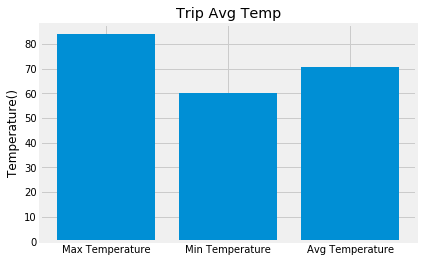

In [240]:
# Ploted the results from query as a bar chart. 

plt.bar(calc_temps('2013-01-01','2014-01-01').keys(),calc_temps('2013-01-01','2014-01-01').values())
plt.ylabel('Temperature('F')')
plt.title('Trip Avg Temp')
plt.show()